# CS 1656 – Introduction to Data Science 

## Instructor: Xiaowei Jia / Teaching Assistant: Evangelos Karageorgos

### Additional Credits: Xiaoting Li, Tahereh Arabghalizi, Zuha Agha, Anatoli Shein, Phuong Pham

## Recitation 5: Clustering
---
In this recitation you will be learning clustering along with a little bit more on dataframes and the basics of numpy arrays. Packages you will need are,
* numpy
* pandas
* sklearn
* matplotlib

As always, the step is to import the packages above. 

In [1]:
import numpy as np
import pandas as pd
from sklearn import cluster
import matplotlib.pyplot as plt

# To show plots inline 
%matplotlib inline

## Dataframes, Groupby & Numpy Arrays

Our dataset represents the number of crimes per 100,000 people for every state

We will start by reading our input file into a dataframe:

In [2]:
df = pd.read_csv('crime_data.csv')
df.head()

,State,Murder,Assault,UrbanPop,Rape,CrimeCluster
0,Alabama,13.2,236,58,21.2,4
1,Alaska,10.0,263,48,44.5,4
2,Arizona,8.1,294,80,31.0,4
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,4


Next we will group our data by the cluster label and compute the mean of each cluster across all columns as shown below. This will be used later to compare the output of our kmeans clustering.

In [3]:
df_group = df.groupby(['CrimeCluster'])
df_group.mean()

,Murder,Assault,UrbanPop,Rape
CrimeCluster,,,,
1,2.950000,62.700000,53.900000,11.510000
2,5.590000,112.400000,65.600000,17.270000
3,8.214286,173.285714,70.642857,22.842857
4,11.812500,272.562500,68.312500,28.375000


## Kmeans Clustering
Kmeans is an unsupervised clustering algorithm, useful for data big data analysis, as it allows compressing the data into clusters based on their similarity. The general idea of the algorithm is to start with a random initialization of cluster centers and then assign each data sample to the nearest cluster by measuring its distance to all cluster centers. The process is repeated iteratively 

We will begin by intializing our object for kmeans. The main parameter of kmeans clustering algorithm is the number of clusters to form, given by parameter `n_clusters` in the function below. Other paramters include `init` which specifies the method for initialization of cluster centroids and `random_state` which is a fixed seed used by the random number generator. Fixing the random number generator seed allows replicating results with repeated runs, otherwise repeated run could be initialzed with different random seeds giving different outputs. 

In [4]:
k_means = cluster.KMeans(n_clusters=4, init = 'k-means++',\
                         random_state=5000)

Remember that an unsupervised algorithm means that the algorithm work without having any knowledge of the true labels, in this case the `CrimeCluster` labels. The algorithm only takes the input features and outputs cluster labels for each data sample. We will only use two features as input to clustering here so that it is easy for us to visualize the clusters on a 2 dimensional scatter plot. Later you will be given a task where you will use all data features for clustering as well. 

To run kmeans on a data, use the following command. 

In [5]:
k_means.fit(df[['Murder', 'Assault']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5000, tol=0.0001, verbose=0)

Let's look at the output of our kmeans clusters. One way is to look at the cluster centroids. A cluster centroid is the mean of all data samples within a cluster. So we can compare our cluster centroids to the actual cluster means we calculated earlier.

In [6]:
print (k_means.cluster_centers_)
print ('\n')
print (df_group[['Murder','Assault']].mean())

[[  2.95        62.7       ]
 [ 11.8125     272.5625    ]
 [  8.21428571 173.28571429]
 [  5.59       112.4       ]]


                 Murder     Assault
CrimeCluster                       
1              2.950000   62.700000
2              5.590000  112.400000
3              8.214286  173.285714
4             11.812500  272.562500


Looking at the output, we can see that the output of our predicted kmeans cluster centers matches the mean of actual clusters shown above. But the order is slightly different. That's okay.

Also, notice the data structure of cluster_centers.

In [7]:
 type(k_means.cluster_centers_)

numpy.ndarray

Now, what are numpy arrays? Numpy arrays are n-dimenisonal arrays in python , extremely useful for large scale linear algebra and matrix operations.

Let's look at out predicted cluster labels output now.

In [8]:
print(k_means.labels_)

[1 1 1 2 1 2 3 1 1 2 0 3 1 3 0 3 3 1 0 1 2 1 0 1 2 3 3 1 0 2 1 1 1 0 3 2 2
 3 2 1 0 2 2 3 0 2 2 0 0 2]


As you can see our predicted cluster labels are ordered differently, let's do the following to reorder our predicted cluster labels now.

In [9]:
labels_reorder = np.choose(k_means.labels_, [1,4,3,2])
print (labels_reorder)

[4 4 4 3 4 3 2 4 4 3 1 2 4 2 1 2 2 4 1 4 3 4 1 4 3 2 2 4 1 3 4 4 4 1 2 3 3
 2 3 4 1 3 3 2 1 3 3 1 1 3]


Next, we will compare our predicted cluster labels with our ground truth cluster labels by adding our predicted labels as a column in the data frame. Remember that a column of the Dataframe is a Series object and you can create a Series object from a numpy array.

In [10]:
df['PredictedCluster'] = pd.Series(labels_reorder, index=df.index)
df.head()

,State,Murder,Assault,UrbanPop,Rape,CrimeCluster,PredictedCluster
0,Alabama,13.2,236,58,21.2,4,4
1,Alaska,10.0,263,48,44.5,4,4
2,Arizona,8.1,294,80,31.0,4,4
3,Arkansas,8.8,190,50,19.5,3,3
4,California,9.0,276,91,40.6,4,4


To check if we have any rows where the `CrimeCluster` and `PredictedCluster` labels do not match, we can use the selection operators of the dataframe as shown below. 

In [11]:
df[df['PredictedCluster'] != df['CrimeCluster']]

,State,Murder,Assault,UrbanPop,Rape,CrimeCluster,PredictedCluster


The output shows that there are no rows where the two labels mismatch. But you could have a different predicted labels output based on seed initialization, or choice of k, or cluster centers initialization.

## Visualizing Clusters
Now we will visualize our clusters using scatter plots learnt in the previous recitations.

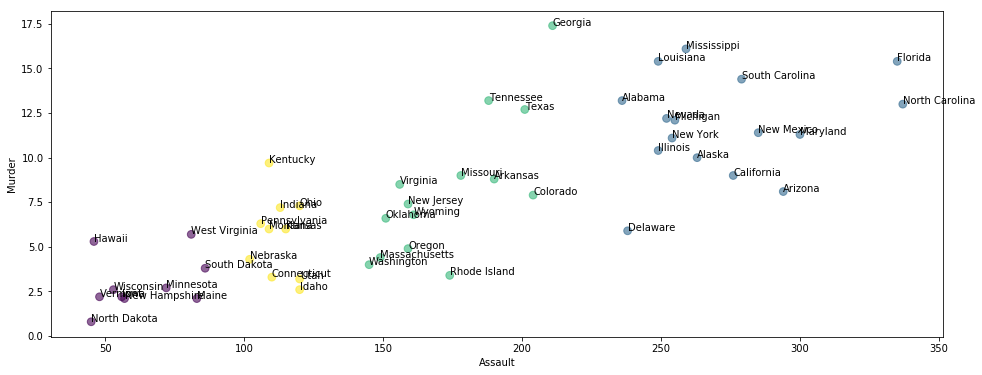

In [12]:
fig = plt.figure(figsize=(16,6))
plt.scatter(df['Assault'],df['Murder'],60,c=k_means.labels_, alpha = 0.6)
plt.xlabel('Assault')
plt.ylabel('Murder')

[plt.text(row.Assault, row.Murder, row.State) for row in df.itertuples()]

plt.show()

Good to see Pennsylvania has a relatively low crime rate :)

## Cluster Analysis
The last step is to analyze the impact of different values for `n_clusters` on our clustering output. Good clustering output will have clusters that are well-separated with samples that are close to one another, i.e the sum of distances to cluster centroid is low within a cluster. If samples within a cluster are too spread out and the boundary between the clusters is not well separated, then the clustering output is not good enough. The key to good clustering is finding the right cluster size. Note that the number of distinct clusters within a data is not known to the  algorithm as the algorithm is unsupervised. 

Let's try kmeans with 3 clusters. 

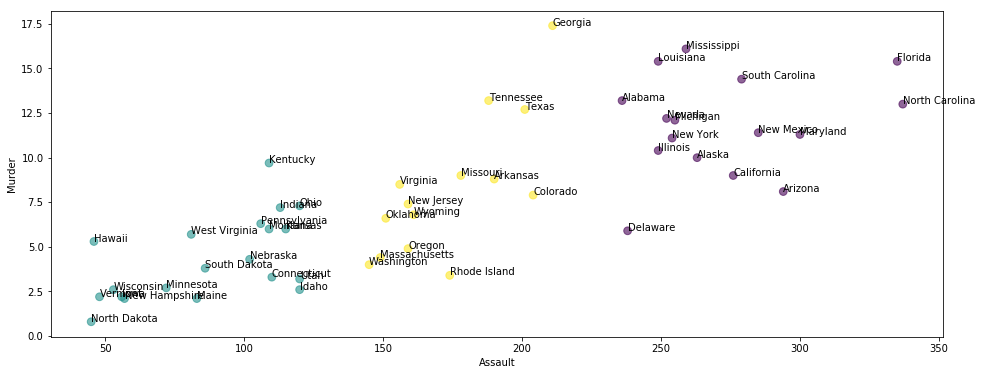

In [13]:
k_means = cluster.KMeans(n_clusters=3, init='k-means++', random_state=5000)
k_means.fit(df[['Murder', 'Assault']])

fig = plt.figure(figsize=(16,6))
plt.scatter(df['Assault'],df['Murder'],60,c=k_means.labels_, alpha = 0.6)
plt.xlabel('Assault')
plt.ylabel('Murder')

[plt.text(row.Assault, row.Murder, row.State) for row in df.itertuples()]

plt.show()

How about kmeans with 2 clusters?

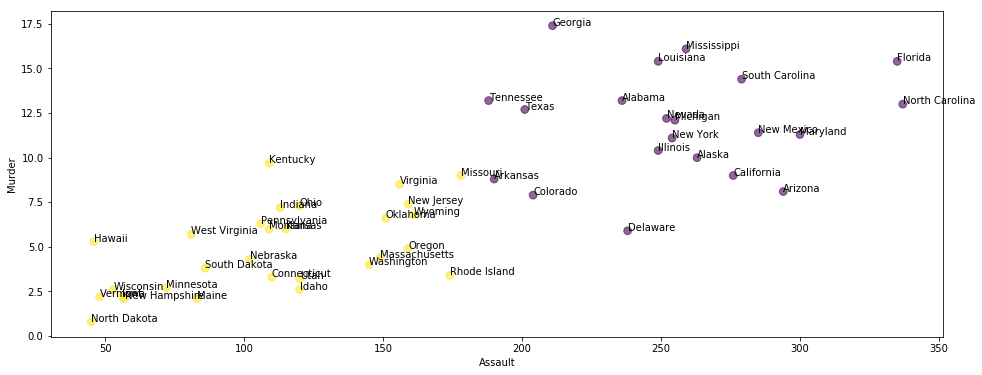

In [14]:
k_means = cluster.KMeans(n_clusters=2, init='k-means++', random_state=5000)
k_means.fit(df[['Murder', 'Assault']])

fig = plt.figure(figsize=(16,6))
plt.scatter(df['Assault'],df['Murder'],60,c=k_means.labels_, alpha = 0.6)
plt.xlabel('Assault')
plt.ylabel('Murder')

[plt.text(row.Assault, row.Murder, row.State) for row in df.itertuples()]

plt.show()

Looking at the outputs above we can see how the separation of clusters and the spread of clusters is affected as k changes. 

## Tasks
You have to do the following three tasks on the file protein.csv. The data represents the average protein consumption (grams per person per day) for different sources of protein for different countries.

**Task 1** 

Run kmeans clustering on the protein.csv file using only the 'White Meat' and 'Red Meat' columns. Use your choice of value for inital k. Also, produce a scatter plot showing the clusters for 'White Meat' and 'Red Meat'. Make sure you label all the countries on the scatter plot. 

**Task 2** 

Plot and observe the output with atleast three different values of k. What do you think is the best choice for k and why?

**Task 3** 

Using the best k found in the previous task, run kmeans using all columns for input features. Also, produce a scatter plot showing the clusters for 'White Meat' and 'Red Meat'. Observe the difference in output labels and cluster centroids using all columns versus the output using two columns. Looking at the output clusters, do you think it is better or worse to use more input features? 